# Finite Differences for Boundary Value Problems

In [1]:
import numpy as np
import matplotlib.pyplot as pt

import scipy.sparse as sps

We'll solve

$u''+1000(1+x^2)u=0$ on $(-1,1)$

with $u(-1)=3$ and $u(1)=-3$.

In [17]:
n = 9
#n = 200

mesh = np.linspace(-1, 1, n)
h = mesh[1] - mesh[0]

Use `sps.diags(values, offsets=..., shape=(n, n))` to make a centered difference matrix.

In [18]:
A = sps.diags(
    [1,-2,1],
    offsets=[-1,0,1], 
    shape=(n, n))

if n < 10:
    print(A.todense())

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.]]


Create `second_deriv` as a matrix to apply the second derivative. Can only do that for the interior points!

* change `shape` and offsets
* Take `h` into account

In [19]:
second_deriv = sps.diags(
    [1,-2,1],
    offsets=np.array([-1,0,1])+1,
    shape=(n-2, n))/h**2


if n < 10:
    print(second_deriv.todense())

[[ 16. -32.  16.   0.   0.   0.   0.   0.   0.]
 [  0.  16. -32.  16.   0.   0.   0.   0.   0.]
 [  0.   0.  16. -32.  16.   0.   0.   0.   0.]
 [  0.   0.   0.  16. -32.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16. -32.  16.   0.   0.]
 [  0.   0.   0.   0.   0.  16. -32.  16.   0.]
 [  0.   0.   0.   0.   0.   0.  16. -32.  16.]]


Make a matrix for the lower-order term.

In [20]:
factor = sps.diags(
    [1000*(1 + mesh[1:]**2)],
    offsets=[1],
    shape=(n-2, n))

if n < 10:
    print(mesh[1:-1])
    print()
    print(factor.todense())

[-0.75 -0.5  -0.25  0.    0.25  0.5   0.75]

[[   0.  1562.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.  1250.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.  1062.5    0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.  1000.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.  1062.5    0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.  1250.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.  1562.5    0. ]]


Build the matrix for the interior:

In [21]:
A_int = second_deriv+factor

if n < 10:
    print(A_int.todense())

[[  16.  1530.5   16.     0.     0.     0.     0.     0.     0. ]
 [   0.    16.  1218.    16.     0.     0.     0.     0.     0. ]
 [   0.     0.    16.  1030.5   16.     0.     0.     0.     0. ]
 [   0.     0.     0.    16.   968.    16.     0.     0.     0. ]
 [   0.     0.     0.     0.    16.  1030.5   16.     0.     0. ]
 [   0.     0.     0.     0.     0.    16.  1218.    16.     0. ]
 [   0.     0.     0.     0.     0.     0.    16.  1530.5   16. ]]


Glue on the rows for the boundary conditions:

In [22]:
A = sps.vstack([
    sps.coo_matrix(([1], ([0],[0])), shape=(1, n)),
    A_int,
    sps.coo_matrix(([1], ([0],[n-1])), shape=(1, n)),
    ])
A = sps.csr_matrix(A)

if n < 10:
    print(A.todense())

[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00]
 [1.6000e+01 1.5305e+03 1.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.6000e+01 1.2180e+03 1.6000e+01 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.6000e+01 1.0305e+03 1.6000e+01 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 1.6000e+01 9.6800e+02 1.6000e+01
  0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.6000e+01 1.0305e+03
  1.6000e+01 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.6000e+01
  1.2180e+03 1.6000e+01 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.6000e+01 1.5305e+03 1.6000e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 1.0000e+00]]


Next, assemble the right-hand side as `rhs`:

Pay special attention to the boundary conditions. What entries of `rhs` do they correspond to?

In [23]:
rhs = np.zeros(n)
rhs[0] = 3
rhs[-1] = -3

To wrap up, solve and plot:

In [24]:
import scipy.sparse.linalg as sla

sol = sla.spsolve(A, rhs)

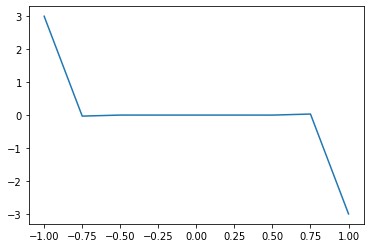

In [25]:
pt.plot(mesh, sol)

In [26]:
A.diagonal()

array([1.0000e+00, 1.5305e+03, 1.2180e+03, 1.0305e+03, 9.6800e+02,
       1.0305e+03, 1.2180e+03, 1.5305e+03, 1.0000e+00])

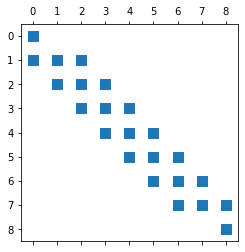

In [28]:
pt.spy(A)